#### CNN for Computer Vision

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
#import keras
#from keras import layers

####Model Design

In [9]:
input = keras.Input(shape=(28,28,1))
data_augmentation = keras.Sequential(
    [
      layers.RandomFlip ("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.2)
    ]
)
x = data_augmentation (input)
x = layers.Conv2D(filters=32,kernel_size= 3, activation="relu", padding='same')(x)
x = layers.MaxPooling2D(pool_size= 2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
output = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs = input, outputs = output)



####summary of model

In [10]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 804,554 (3.07 MB)

 Trainable params: 804,554 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

#### Training

In [18]:
from tensorflow.keras.datasets import mnist
# making sure that the values are float so that we acn get decimal point after division
# Normalizeing the RGB codes by dividing it to the max RGB value
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()
train_images = train_images.reshape(train_images.shape[0],28,28,1).astype('float32')/255
test_images = test_images.reshape(test_images.shape[0],28,28,1).astype('float32')/255
#Reserve 10000 samples for validation
x_val = train_images[-10000:]
y_val = train_labels[-10000:]

train_images = train_images[:-10000]
train_labels = train_labels[:-10000]

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs=2, batch_size = 64, validation_data = (x_val, y_val))
print('......................................')
print('.  number of train data is: ', train_images.shape[0],'  .')
print('.  number of test data is: ', test_images.shape[0]  ,'   .')
print('......................................')

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8453 - loss: 0.5079 - val_accuracy: 0.8951 - val_loss: 0.3342
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8705 - loss: 0.4299 - val_accuracy: 0.9200 - val_loss: 0.2672
......................................
.  number of train data is:  50000   .
.  number of test data is:  10000    .
......................................


####Evaluation

In [12]:
model.evaluate(test_images, test_labels, batch_size = 64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9492 - loss: 0.1570


[0.13320797681808472, 0.95660001039505]

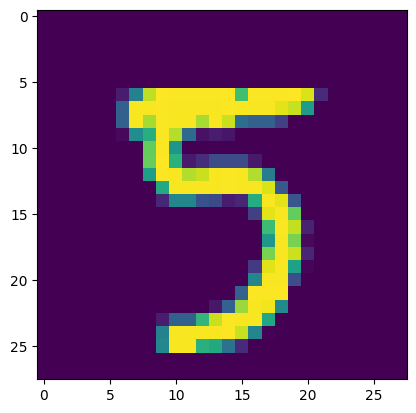

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
The sample is : 5


In [13]:
import matplotlib.pyplot as plt

image_index = 4440
#plt.imshow(test_images[image_index].reshape(28,28), cmap='Greys')
plt.imshow(test_images[image_index].reshape(28,28))
plt.show()
pred = model.predict(test_images[image_index].reshape(1,28,28,1))
print("The sample is :",pred.argmax())